In [3]:
#LOAN PREDICTION 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("C:\\Users\\aryan\\Downloads\\LOAN.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#THIS IS USED TO CHECK HOW MANY ROWS AND COLUMNS ARE THERE
data.shape

(614, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#TO CHECK DUPLICATE ITEMS
data.duplicated().sum()

0

In [9]:
#WE ARE DROPPING THE COLUMNS WHICH ARE NOT REQUIRED
#SINCE GENDER AND COAPPLICANTINCOME ARE NOT REQUIRED FOR APPROVAL OF LOAN, WE ARE DROPPING THOSE
data=data.drop(["Gender", "CoapplicantIncome",], axis = 1)
data.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,NaN,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y


In [10]:
#TO CHECK NULL VALUES
data.isna().sum()

Loan_ID              0
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#MODE IS FREQUENTLY OCCURING VALUE IN COLUMN, IT WORKS ON CATEGORICAL VALUE(YES,N0,MALE,FEMALE KIND VALUE)
#MEAN REPRESENTS AVERAGE VALUE IN NUMERICAL VALUE
#INPLACE=TRUE IS USEFUL TO MAKE SURE THAT CHANGES WILL BE APPLIED DIRECTLY TO ORIGINAL DATA
data['Self_Employed'].fillna(data['Self_Employed'].mode().values[0], inplace = True)
data['Self_Employed'].isnull().sum()

0

In [12]:
data['Married'].fillna(data['Married'].mode().values[0], inplace = True)
data['Married'].isnull().sum()

0

In [13]:
data['Dependents'].fillna(data['Dependents'].mode().values[0], inplace = True)
data['Dependents'].isnull().sum()

0

In [14]:
data['LoanAmount'].fillna(data['LoanAmount'].mode().values[0], inplace = True)
data['LoanAmount'].isnull().sum()

0

In [15]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode().values[0], inplace = True)
data['Loan_Amount_Term'].isnull().sum()

0

In [20]:
data['Credit_History'].fillna(data['Credit_History'].mode().values[0], inplace = True)
data['Credit_History'].isnull().sum()

0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Married           614 non-null    object 
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     614 non-null    object 
 5   ApplicantIncome   614 non-null    int64  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 52.9+ KB


In [17]:
data.isna().sum()

Loan_ID              0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
LoanAmount           0
Loan_Amount_Term     0
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,120.0,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [19]:
data['Married'].value_counts()

Married
Yes    401
No     213
Name: count, dtype: int64

In [20]:
data=data.replace({'Yes': 1, 'No': 0})
data['Married'].value_counts()

Married
1    401
0    213
Name: count, dtype: int64

In [43]:
data['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [21]:
data=data.replace(to_replace='3+', value=4)
data['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [22]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [23]:
data=data.replace({'Graduate': 1, 'Not Graduate': 0})
data['Education'].value_counts()

Education
1    480
0    134
Name: count, dtype: int64

In [24]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,1,0,5849,120.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,4583,128.0,360.0,1.0,Rural,N
2,LP001005,1,0,1,1,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,1,0,0,0,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,1,0,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,1,4,1,0,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,1,2,1,0,7583,187.0,360.0,1.0,Urban,Y


In [48]:
data['Self_Employed'].value_counts()

Self_Employed
0    532
1     82
Name: count, dtype: int64

In [25]:
data=data.replace({'Yes':1, 'No':0})
data['Self_Employed'].value_counts()

Self_Employed
0    532
1     82
Name: count, dtype: int64

In [26]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,1,0,5849,120.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,0,4583,128.0,360.0,1.0,Rural,N
2,LP001005,1,0,1,1,3000,66.0,360.0,1.0,Urban,Y
3,LP001006,1,0,0,0,2583,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,1,0,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,2900,71.0,360.0,1.0,Rural,Y
610,LP002979,1,4,1,0,4106,40.0,180.0,1.0,Rural,Y
611,LP002983,1,1,1,0,8072,253.0,360.0,1.0,Urban,Y
612,LP002984,1,2,1,0,7583,187.0,360.0,1.0,Urban,Y


In [27]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [28]:
data=data.replace({'Urban':0, 'Semiurban':1, 'Rural':2})
data['Property_Area'].value_counts()

Property_Area
1    233
0    202
2    179
Name: count, dtype: int64

In [29]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [30]:
data=data.replace({'Y':1, 'N':0})
data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [31]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,1,0,5849,120.0,360.0,1.0,0,1
1,LP001003,1,1,1,0,4583,128.0,360.0,1.0,2,0
2,LP001005,1,0,1,1,3000,66.0,360.0,1.0,0,1
3,LP001006,1,0,0,0,2583,120.0,360.0,1.0,0,1
4,LP001008,0,0,1,0,6000,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,2900,71.0,360.0,1.0,2,1
610,LP002979,1,4,1,0,4106,40.0,180.0,1.0,2,1
611,LP002983,1,1,1,0,8072,253.0,360.0,1.0,0,1
612,LP002984,1,2,1,0,7583,187.0,360.0,1.0,0,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loan_ID           614 non-null    object 
 1   Married           614 non-null    int64  
 2   Dependents        614 non-null    object 
 3   Education         614 non-null    int64  
 4   Self_Employed     614 non-null    int64  
 5   ApplicantIncome   614 non-null    int64  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    int64  
 10  Loan_Status       614 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 52.9+ KB


In [57]:
#CHECKING THE CORELATION
data.corr(numeric_only=True)

,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Married,1.000000,-0.012304,0.004489,0.051708,0.146212,-0.100912,0.010938,-0.004257,0.091478
Education,-0.012304,1.000000,0.010383,0.140760,0.169436,0.073928,0.073658,-0.065243,0.085884
Self_Employed,0.004489,0.010383,1.000000,0.127180,0.114971,-0.033739,-0.001550,0.030860,-0.003700
ApplicantIncome,0.051708,0.140760,0.127180,1.000000,0.564698,-0.046531,-0.018615,0.009500,-0.004710
LoanAmount,0.146212,0.169436,0.114971,0.564698,1.000000,0.037152,-0.000250,0.047414,-0.031808
Loan_Amount_Term,-0.100912,0.073928,-0.033739,-0.046531,0.037152,1.000000,-0.004705,0.076120,-0.022549
Credit_History,0.010938,0.073658,-0.001550,-0.018615,-0.000250,-0.004705,1.000000,-0.001963,0.540556
Property_Area,-0.004257,-0.065243,0.030860,0.009500,0.047414,0.076120,-0.001963,1.000000,-0.032112
Loan_Status,0.091478,0.085884,-0.003700,-0.004710,-0.031808,-0.022549,0.540556,-0.032112,1.000000


In [33]:
data

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,1,0,5849,120.0,360.0,1.0,0,1
1,LP001003,1,1,1,0,4583,128.0,360.0,1.0,2,0
2,LP001005,1,0,1,1,3000,66.0,360.0,1.0,0,1
3,LP001006,1,0,0,0,2583,120.0,360.0,1.0,0,1
4,LP001008,0,0,1,0,6000,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,2900,71.0,360.0,1.0,2,1
610,LP002979,1,4,1,0,4106,40.0,180.0,1.0,2,1
611,LP002983,1,1,1,0,8072,253.0,360.0,1.0,0,1
612,LP002984,1,2,1,0,7583,187.0,360.0,1.0,0,1


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

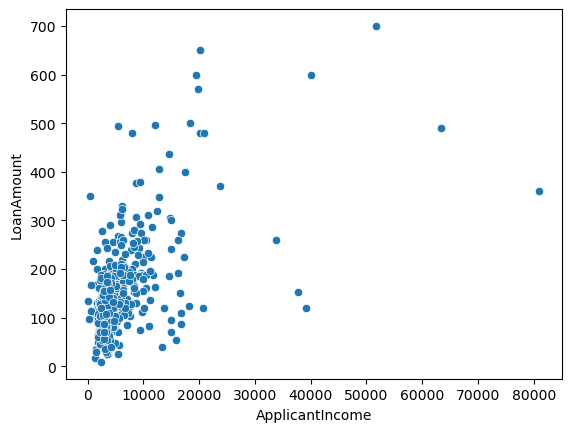

In [34]:
#SINCE APPLICANT INCOME AND LOAN AMOUNT ARE CORELATED TO EACH OTHER
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=data)

Text(0.5, 1.0, 'Corelation between Applicant Income and Loan Amount')

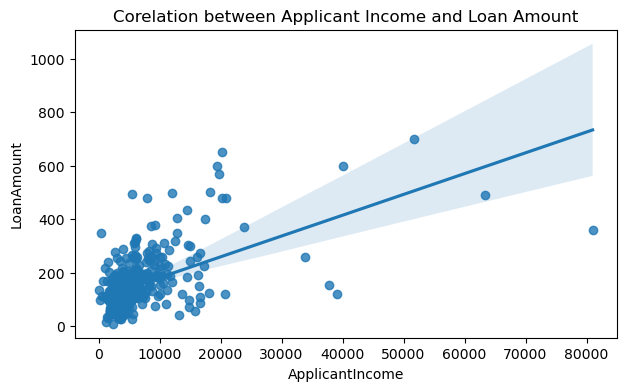

In [35]:
#CO RELATION BETWEEN APPLICANT INCOME AND LOAN AMOUNT
#LOAN AMOUNT WILL BE BIGGER IF APPLICANT INCOME WILL BE MORE
plt.figure(figsize=(7,4))
sns.regplot(x=data["ApplicantIncome"],y=data["LoanAmount"])
plt.title("Corelation between Applicant Income and Loan Amount")

Text(0.5, 1.0, 'Corelation between Credit History and Loan Status')

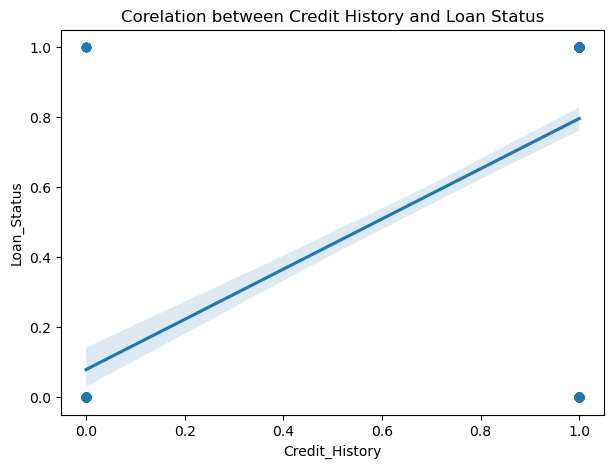

In [36]:
#IF THE CREDIT HISTORY IS HIGH, LOAN STATUS GETS APPROVED
plt.figure(figsize=(7,5))
sns.regplot(x=data['Credit_History'],y=data['Loan_Status'])
plt.title('Corelation between Credit History and Loan Status')

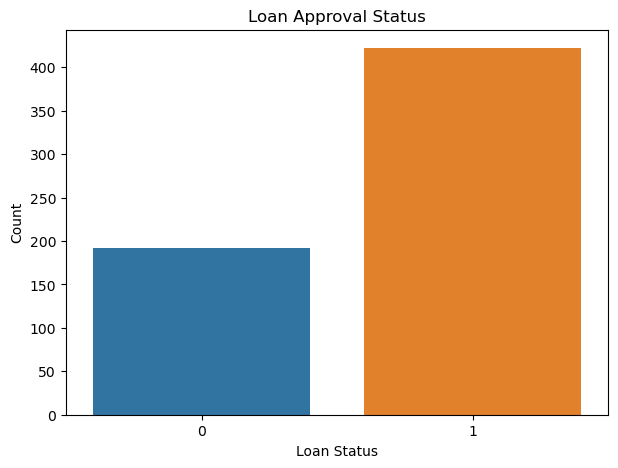

In [37]:
#BAR PLOT FOR LOAN STATUS COUNT
plt.figure(figsize=(7,5))
sns.countplot(x="Loan_Status",data=data)
plt.title("Loan Approval Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()